In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn

from load_data import RawDataLoader

os.environ["NFL_HOME"] = "/home/sam/repos/hobby-repos/nfl/"
rawLoader = RawDataLoader()
games_df, plays_df, players_df, location_data_df = rawLoader.get_data(weeks=[i for i in range(1, 10)])

# Exploring games_df

In [3]:
print(games_df.head())

       gameId  season  week   gameDate gameTimeEastern homeTeamAbbr  \
0  2022090800    2022     1   9/8/2022        20:20:00           LA   
1  2022091100    2022     1  9/11/2022        13:00:00          ATL   
2  2022091101    2022     1  9/11/2022        13:00:00          CAR   
3  2022091102    2022     1  9/11/2022        13:00:00          CHI   
4  2022091103    2022     1  9/11/2022        13:00:00          CIN   

  visitorTeamAbbr  homeFinalScore  visitorFinalScore  
0             BUF              10                 31  
1              NO              26                 27  
2             CLE              24                 26  
3              SF              19                 10  
4             PIT              20                 23  


In [4]:
unique_teams = pd.unique(games_df[['homeTeamAbbr', 'visitorTeamAbbr']].values.ravel())
stats = {t: {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}} for t in unique_teams}
print(stats)

{'LA': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'BUF': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'ATL': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'NO': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'CAR': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'CLE': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'CHI': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'SF': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'CIN': {'points': {'mean': 0, 'max': 0, 'min': 0, 'std': 0}, 'record': {'W': 0, 'L': 0, 'T': 0, 'G': 0}}, 'PIT': {'points': {'mean': 0, 'max': 0, 'min': 0

### Getting some stats on wins/losses/ties

In [5]:
# Assign winner column
games_stats_df = games_df.copy()
winner_list = []
for i in range(len(games_stats_df)):
    home_score = games_stats_df.iloc[i]['homeFinalScore']
    visitor_score = games_stats_df.iloc[i]['visitorFinalScore']
    if home_score > visitor_score:
        winner_list.append(games_stats_df.iloc[i]['homeTeamAbbr'])
    elif home_score < visitor_score:
        winner_list.append(games_stats_df.iloc[i]['visitorTeamAbbr'])
    else:
        winner_list.append("tie")
games_stats_df["winner"] = winner_list

# Determine result stats
home_team_wins = len(games_stats_df[games_stats_df["winner"] == games_stats_df["homeTeamAbbr"]])
visitor_team_wins = len(games_stats_df[games_stats_df["winner"] == games_stats_df["visitorTeamAbbr"]])
ties = len(games_stats_df[games_stats_df["winner"] == "tie"])
print(f'Home team wins: {home_team_wins}')
print(f'Visitor team wins: {visitor_team_wins}')
print(f'Ties: {ties}')
print()


Home team wins: 73
Visitor team wins: 62
Ties: 1



In [6]:
# Determine inividual schedule and record
for home, away, winner in games_stats_df[['homeTeamAbbr','visitorTeamAbbr','winner']].itertuples(index=False, name=None):
    # count a game for both teams
    stats[home]["record"]['G'] += 1
    stats[away]["record"]['G'] += 1

    # ties
    if winner.strip().lower() == 'tie':
        stats[home]["record"]['T'] += 1
        stats[away]["record"]['T'] += 1
        continue

    # wins/losses
    if winner == home:
        stats[home]["record"]['W'] += 1
        stats[away]["record"]['L'] += 1
    elif winner == away:
        stats[away]["record"]['W'] += 1
        stats[home]["record"]['L'] += 1
    else:
        print(f"Skipping row with unknown winner: {winner} with {home}/{away}")
        pass

# show records
print(f"{'Team':<5} {'W':>5} {'L':>5} {'T':>5} {'G':>5}")
print("-" * 35)
for team in stats.keys():
    r = stats[team]['record']
    print(f"{team:<5} {r['W']:5d} {r['L']:5d} {r['T']:5d} {r['G']:5d}")

Team      W     L     T     G
-----------------------------------
LA        3     5     0     8
BUF       6     2     0     8
ATL       4     5     0     9
NO        3     6     0     9
CAR       2     7     0     9
CLE       3     5     0     8
CHI       3     6     0     9
SF        4     4     0     8
CIN       5     4     0     9
PIT       2     6     0     8
DET       2     6     0     8
PHI       8     0     0     8
HOU       1     6     1     8
IND       3     5     1     9
MIA       6     3     0     9
NE        5     4     0     9
NYJ       6     3     0     9
BAL       6     3     0     9
WAS       4     5     0     9
JAX       3     6     0     9
ARI       3     6     0     9
KC        6     2     0     8
LAC       5     3     0     8
LV        2     6     0     8
MIN       7     1     0     8
GB        3     6     0     9
TEN       5     3     0     8
NYG       6     2     0     8
DAL       6     2     0     8
TB        4     5     0     9
SEA       6     3     0     9
DEN 

### Getting some stats on points

In [7]:
# Determine avg points
games_stats_df["totalPoints"] = games_stats_df["homeFinalScore"] + games_stats_df["visitorFinalScore"]
print(games_stats_df["totalPoints"].describe())
print()
print(games_stats_df["homeFinalScore"].describe())
print()
print(games_stats_df["visitorFinalScore"].describe())

count    136.000000
mean      43.617647
std       13.971431
min       19.000000
25%       33.750000
50%       42.000000
75%       52.000000
max       93.000000
Name: totalPoints, dtype: float64

count    136.000000
mean      22.669118
std        8.659874
min        3.000000
25%       17.000000
50%       22.500000
75%       27.000000
max       49.000000
Name: homeFinalScore, dtype: float64

count    136.000000
mean      20.948529
std        9.731446
min        0.000000
25%       14.750000
50%       20.000000
75%       27.000000
max       48.000000
Name: visitorFinalScore, dtype: float64


In [8]:
# Create melted df
cols = ['week', 'homeTeamAbbr', 'visitorTeamAbbr', 'homeFinalScore', 'visitorFinalScore']
home = games_stats_df[['week', 'homeTeamAbbr', 'homeFinalScore']].rename(columns={'homeTeamAbbr': 'team', 'homeFinalScore': 'points'})
away = games_stats_df[['week', 'visitorTeamAbbr', 'visitorFinalScore']].rename(columns={'visitorTeamAbbr': 'team', 'visitorFinalScore': 'points'})
team_points = pd.concat([home, away], ignore_index=True)

# Group by team and week
points_by_team_week = (
    team_points
    .groupby(['team', 'week'], as_index=False)['points']
    .sum()  # sum handles any duplicate rows or multiple games in same week
    .sort_values(['team', 'week'])
)
points_by_team_week.head()

,team,week,points
0,ARI,1,21
1,ARI,2,29
2,ARI,3,12
3,ARI,4,26
4,ARI,5,17


In [9]:
# Fill out stats
print(f"{'Team':<5} {'Mean':>8} {'Std':>8} {'Min':>5} {'Max':>5}")
print("-" * 35)

for team in stats.keys():
    stats[team]['points']['mean'] = np.mean(points_by_team_week[points_by_team_week["team"] == team]["points"])
    stats[team]['points']['std'] = np.std(points_by_team_week[points_by_team_week["team"] == team]["points"])
    stats[team]['points']['max'] = np.max(points_by_team_week[points_by_team_week["team"] == team]["points"])
    stats[team]['points']['min'] = np.min(points_by_team_week[points_by_team_week["team"] == team]["points"])
    p = stats[team]['points']
    print(f"{team:<5} {p['mean']:8.2f} {p['std']:8.2f} {p['min']:5d} {p['max']:5d}")

Team      Mean      Std   Min   Max
-----------------------------------
LA       16.38     7.40     9    31
BUF      27.50     8.06    17    41
ATL      24.11     6.56    15    37
NO       23.56     9.15    10    39
CAR      19.89     6.45    10    34
CLE      25.00     5.59    15    32
CHI      20.78     9.04     7    33
SF       22.00     9.27    10    37
CIN      25.33     8.93    13    42
PIT      15.00     6.04     3    23
DET      23.50    14.55     0    45
PHI      28.12     5.60    20    38
HOU      16.62     5.05     9    24
IND      14.67     9.53     0    34
MIA      23.67     9.29    15    42
NE       22.56     8.51     7    38
NYJ      21.78     9.23     9    40
BAL      26.11     6.67    19    38
WAS      17.67     6.73     8    28
JAX      22.11     8.28     6    38
ARI      22.56     9.27     9    42
KC       30.38    10.55    17    44
LAC      23.00     6.76    10    34
LV       22.88    10.59     0    38
MIN      24.12     7.61     7    34
GB       17.11     7.17     

# Explore plays df

In [10]:
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,None,None,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,None,None,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,None,None,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,None,None,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


Look at coverage amounts

In [15]:
coverages = plays_df["pff_passCoverage"].unique()
print(f"Total plays: {len(plays_df)}")
for coverage in coverages:
    print(f"{coverage}: {len(plays_df[plays_df["pff_passCoverage"] == coverage])}")

Total plays: 16124
Cover-3: 4956
Quarters: 2073
Cover-1: 3300
Cover 6-Left: 692
Cover-2: 1852
None: 0
Cover-0: 605
Cover-3 Seam: 636
Cover-6 Right: 690
Goal Line: 146
Red Zone: 537
2-Man: 186
Cover-3 Double Cloud: 9
Bracket: 75
Miscellaneous: 14
Cover-3 Cloud Left: 30
Prevent: 46
Cover-1 Double: 54
Cover-3 Cloud Right: 31


In [19]:
invalid_coverages = ["None", "Red Zone", "Miscellaneous", "Goal Line", None]
valid_coverages = [c for c in coverages if c not in invalid_coverages]
print(valid_coverages)

['Cover-3', 'Quarters', 'Cover-1', 'Cover 6-Left', 'Cover-2', 'Cover-0', 'Cover-3 Seam', 'Cover-6 Right', '2-Man', 'Cover-3 Double Cloud', 'Bracket', 'Cover-3 Cloud Left', 'Prevent', 'Cover-1 Double', 'Cover-3 Cloud Right']


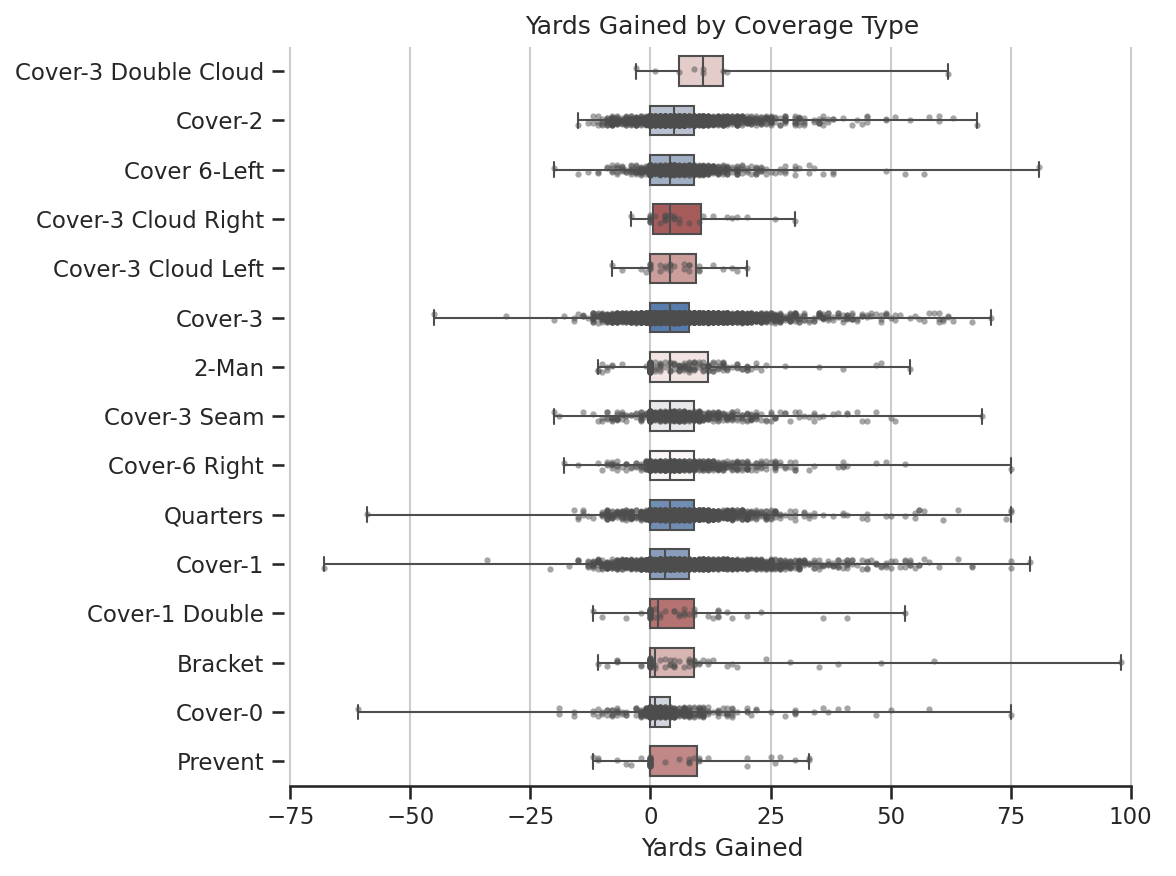

In [38]:
coverage_df = plays_df[plays_df["pff_passCoverage"].isin(valid_coverages)].copy()
order = (
    coverage_df.groupby("pff_passCoverage")["yardsGained"]
    .median()
    .sort_values(ascending=False)
    .index
)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure
fig, ax = plt.subplots(figsize=(8,6), dpi=150)  # higher dpi → crisper

# Optional: if yardsGained spans wide range, enable log scale
# ax.set_xscale("log")

# Horizontal boxplot: yards gained (x) vs coverage (y)
sns.boxplot(
    data=coverage_df,
    x="yardsGained",
    y="pff_passCoverage",
    order=order,
    whis=[0, 100],
    width=0.6,
    palette="vlag",
    hue="pff_passCoverage",
    ax=ax,
    legend=False,
)

# Add each play as a dot for density context
sns.stripplot(
    data=coverage_df,
    x="yardsGained",
    y="pff_passCoverage",
    order=order,
    size=3,
    color=".3",
    alpha=0.5,
    ax=ax
)

# Clean up visuals
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel="Yards Gained", title="Yards Gained by Coverage Type")
sns.despine(trim=True, left=True)
plt.tight_layout()
plt.show()